In [10]:
%matplotlib inline
from importlib import reload
from pathlib import Path

import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 20)

import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

import seaborn as sns
sns.set(style='whitegrid', palette='muted')

from TreeMazeAnalyses2.Analyses import spatial_functions as spatial_funcs
import TreeMazeAnalyses2.Analyses.tree_maze_functions as tmf

from TreeMazeAnalyses2.Analyses import subject_info as si
si = reload(si)

from ipywidgets import interact, fixed
import ipywidgets as widgets

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=UserWarning)

In [3]:
fig_path = Path("/home/alexgonzalez/google-drive/TreeMazeProject/Figures/fig_1/")

In [4]:
from TreeMazeAnalyses2.Analyses import subject_info as si

si = reload(si)
session = 'Li_T3g_070618'
subject = session.split('_')[0]
session_info = si.SubjectSessionInfo(subject, session)

In [5]:
behav = session_info.get_event_behavior(overwrite=True)
behav.trial_table.head()

,t0,tE,dur,cue,dec,correct,long,goal,sw,vsw
0,101,523,422,L,L,1,1,4,0,0
1,890,1332,441,R,L,0,-1,-1,1,1
2,1855,2361,506,L,R,0,-1,-1,1,0
3,2824,3539,714,R,L,0,-1,-1,1,0
4,3759,4434,674,L,L,1,1,4,1,0


In [6]:
track_data, nan_idx = session_info.get_track_data(overwrite=False)
track_data.head()

,t,x,y,ha
0,489.949,190.368533,850.551084,2.234021
1,489.969,176.504035,828.124600,1.815142
2,489.989,171.462017,827.906691,1.815142
3,490.009,162.134914,814.407219,1.431170
4,490.029,131.380287,778.154401,1.692969


## Test API for treemaze figure

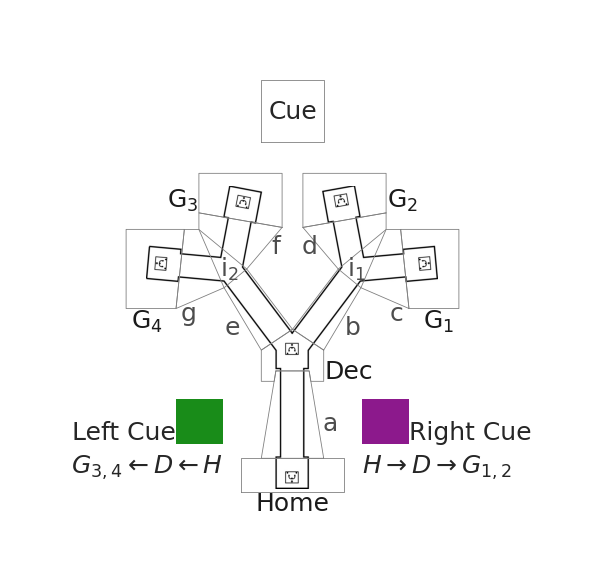

In [7]:
tmf = reload(tmf)
tree_maze = tmf.TreeMazeZones()
f,ax = tree_maze.fig1_layout()

## plot example trials

(0.0, 1.0, 0.0, 1.0)

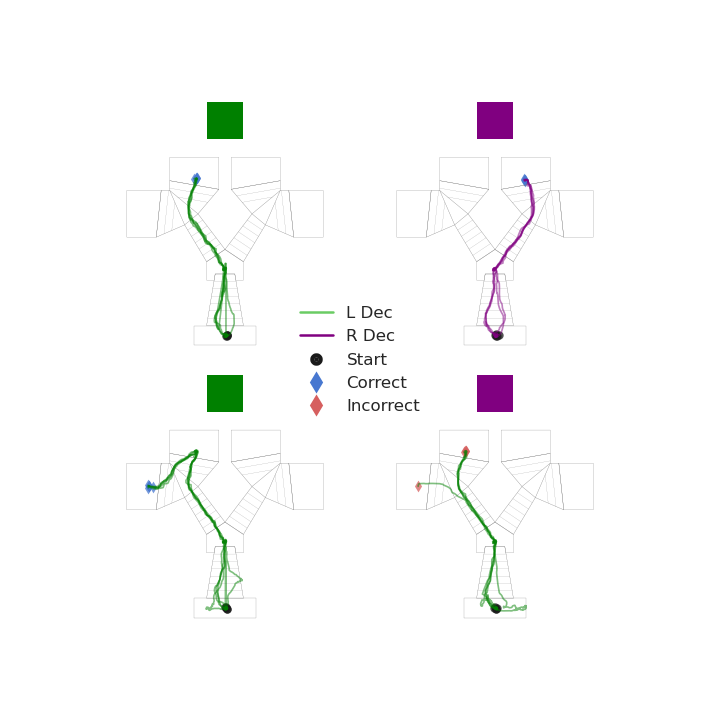

In [11]:
tmf = reload(tmf)
tree_maze = tmf.TreeMazeZones()

f, ax = plt.subplots(2,2, figsize=(1,1),dpi=600)

np.random.seed(1)
cue = np.array([['L', 'R'], ['L', 'R']])
dec = np.array([['L', 'R'], ['L', 'L']])
long_trial = np.array([[0,0],[1,-1]])


n_plot_trials = 5
max_dur = 700
lw=0.2
line_alpha=0.5
marker_alpha = 0.75

for row in range(2):
    for col in range(2):
        dec_full = 'left' if dec[row,col]=='L' else 'right'
        
        _ = tree_maze.plot_maze(seg_color=None, zone_labels=False, seg_alpha=0.1, font_size=5, lw=0.03, sub_seg_lw=0.01,
                                sub_seg_color='None', axis=ax[row,col], plot_cue=True, cue_color= cue[row,col], sub_segs='all')
        
        sub_table = behav.trial_table[ (behav.trial_table.dec==dec[row, col]) & (behav.trial_table.cue==cue[row, col]) &
                                      (behav.trial_table.dur<=max_dur) & (behav.trial_table.long==long_trial[row, col]) ]
        
        sel_trials = np.random.choice(sub_table.index, n_plot_trials, replace=False)
        
        marker_end_color = 'b' if dec[row,col]==cue[row,col] else 'r'
        for trial in sel_trials:
            t0 = sub_table.loc[trial, 't0']
            tE = sub_table.loc[trial, 'tE']
            ax[row,col].plot(track_data.loc[t0:tE, 'x'], track_data.loc[t0:tE, 'y'], 
                           color=tree_maze.split_colors[dec_full], lw=lw, alpha=line_alpha )    
            ax[row,col].scatter(track_data.loc[t0, 'x'],track_data.loc[t0, 'y'], s=1, 
                                marker='o', lw=0, alpha=marker_alpha, color='k')
            ax[row,col].scatter(track_data.loc[tE, 'x'],track_data.loc[tE, 'y'], s=1, 
                                marker='d', lw=0, alpha=marker_alpha, color=marker_end_color)

            
plt.subplots_adjust(hspace=0.02, wspace=0, left=0.05, right=0.95, top=0.95, bottom=0.05)

legend_elements = [Line2D([0], [0], color='g', lw=0.3, label='L Dec'),
                   Line2D([0], [0], color='purple', lw=0.3, label='R Dec'),
                   Line2D([0], [0], marker='o', color='k', lw=0, label='Start',
                          markerfacecolor='k', markersize=0.5),
                   Line2D([0], [0], marker='d', color='b', lw=0, label='Correct',
                          markerfacecolor='b', markersize=0.5),
                   Line2D([0], [0], marker='d', color='r', lw=0, label='Incorrect',
                          markerfacecolor='r', markersize=0.5)]

l_ax = f.add_axes([0,0,1,1])
l_ax.legend(handles=legend_elements, loc='center', fontsize=2, frameon=False)
l_ax.axis("off")

# plot behavior window

In [12]:
tmf = reload(tmf)
tree_maze = tmf.TreeMazeZones()
pos_zones = tree_maze.get_pos_zone_ts(track_data.x, track_data.y)
pos_zones_mat = tree_maze.get_pos_zone_mat(pos_zones)

'L'

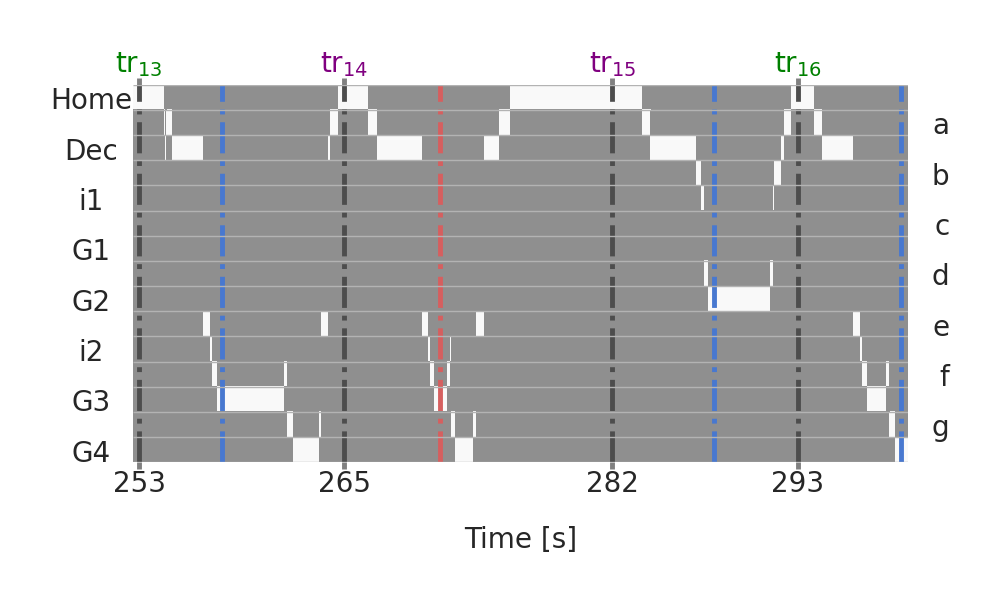

In [163]:
tmf = reload(tmf)
tree_maze = tmf.TreeMazeZones()
ax = tree_maze.plot_zone_ts_window(pos_zones_mat, trial_table=behav.trial_table, t=track_data.t.values-track_data.t[0], trial_nums=trial_nums, fontsize=4)


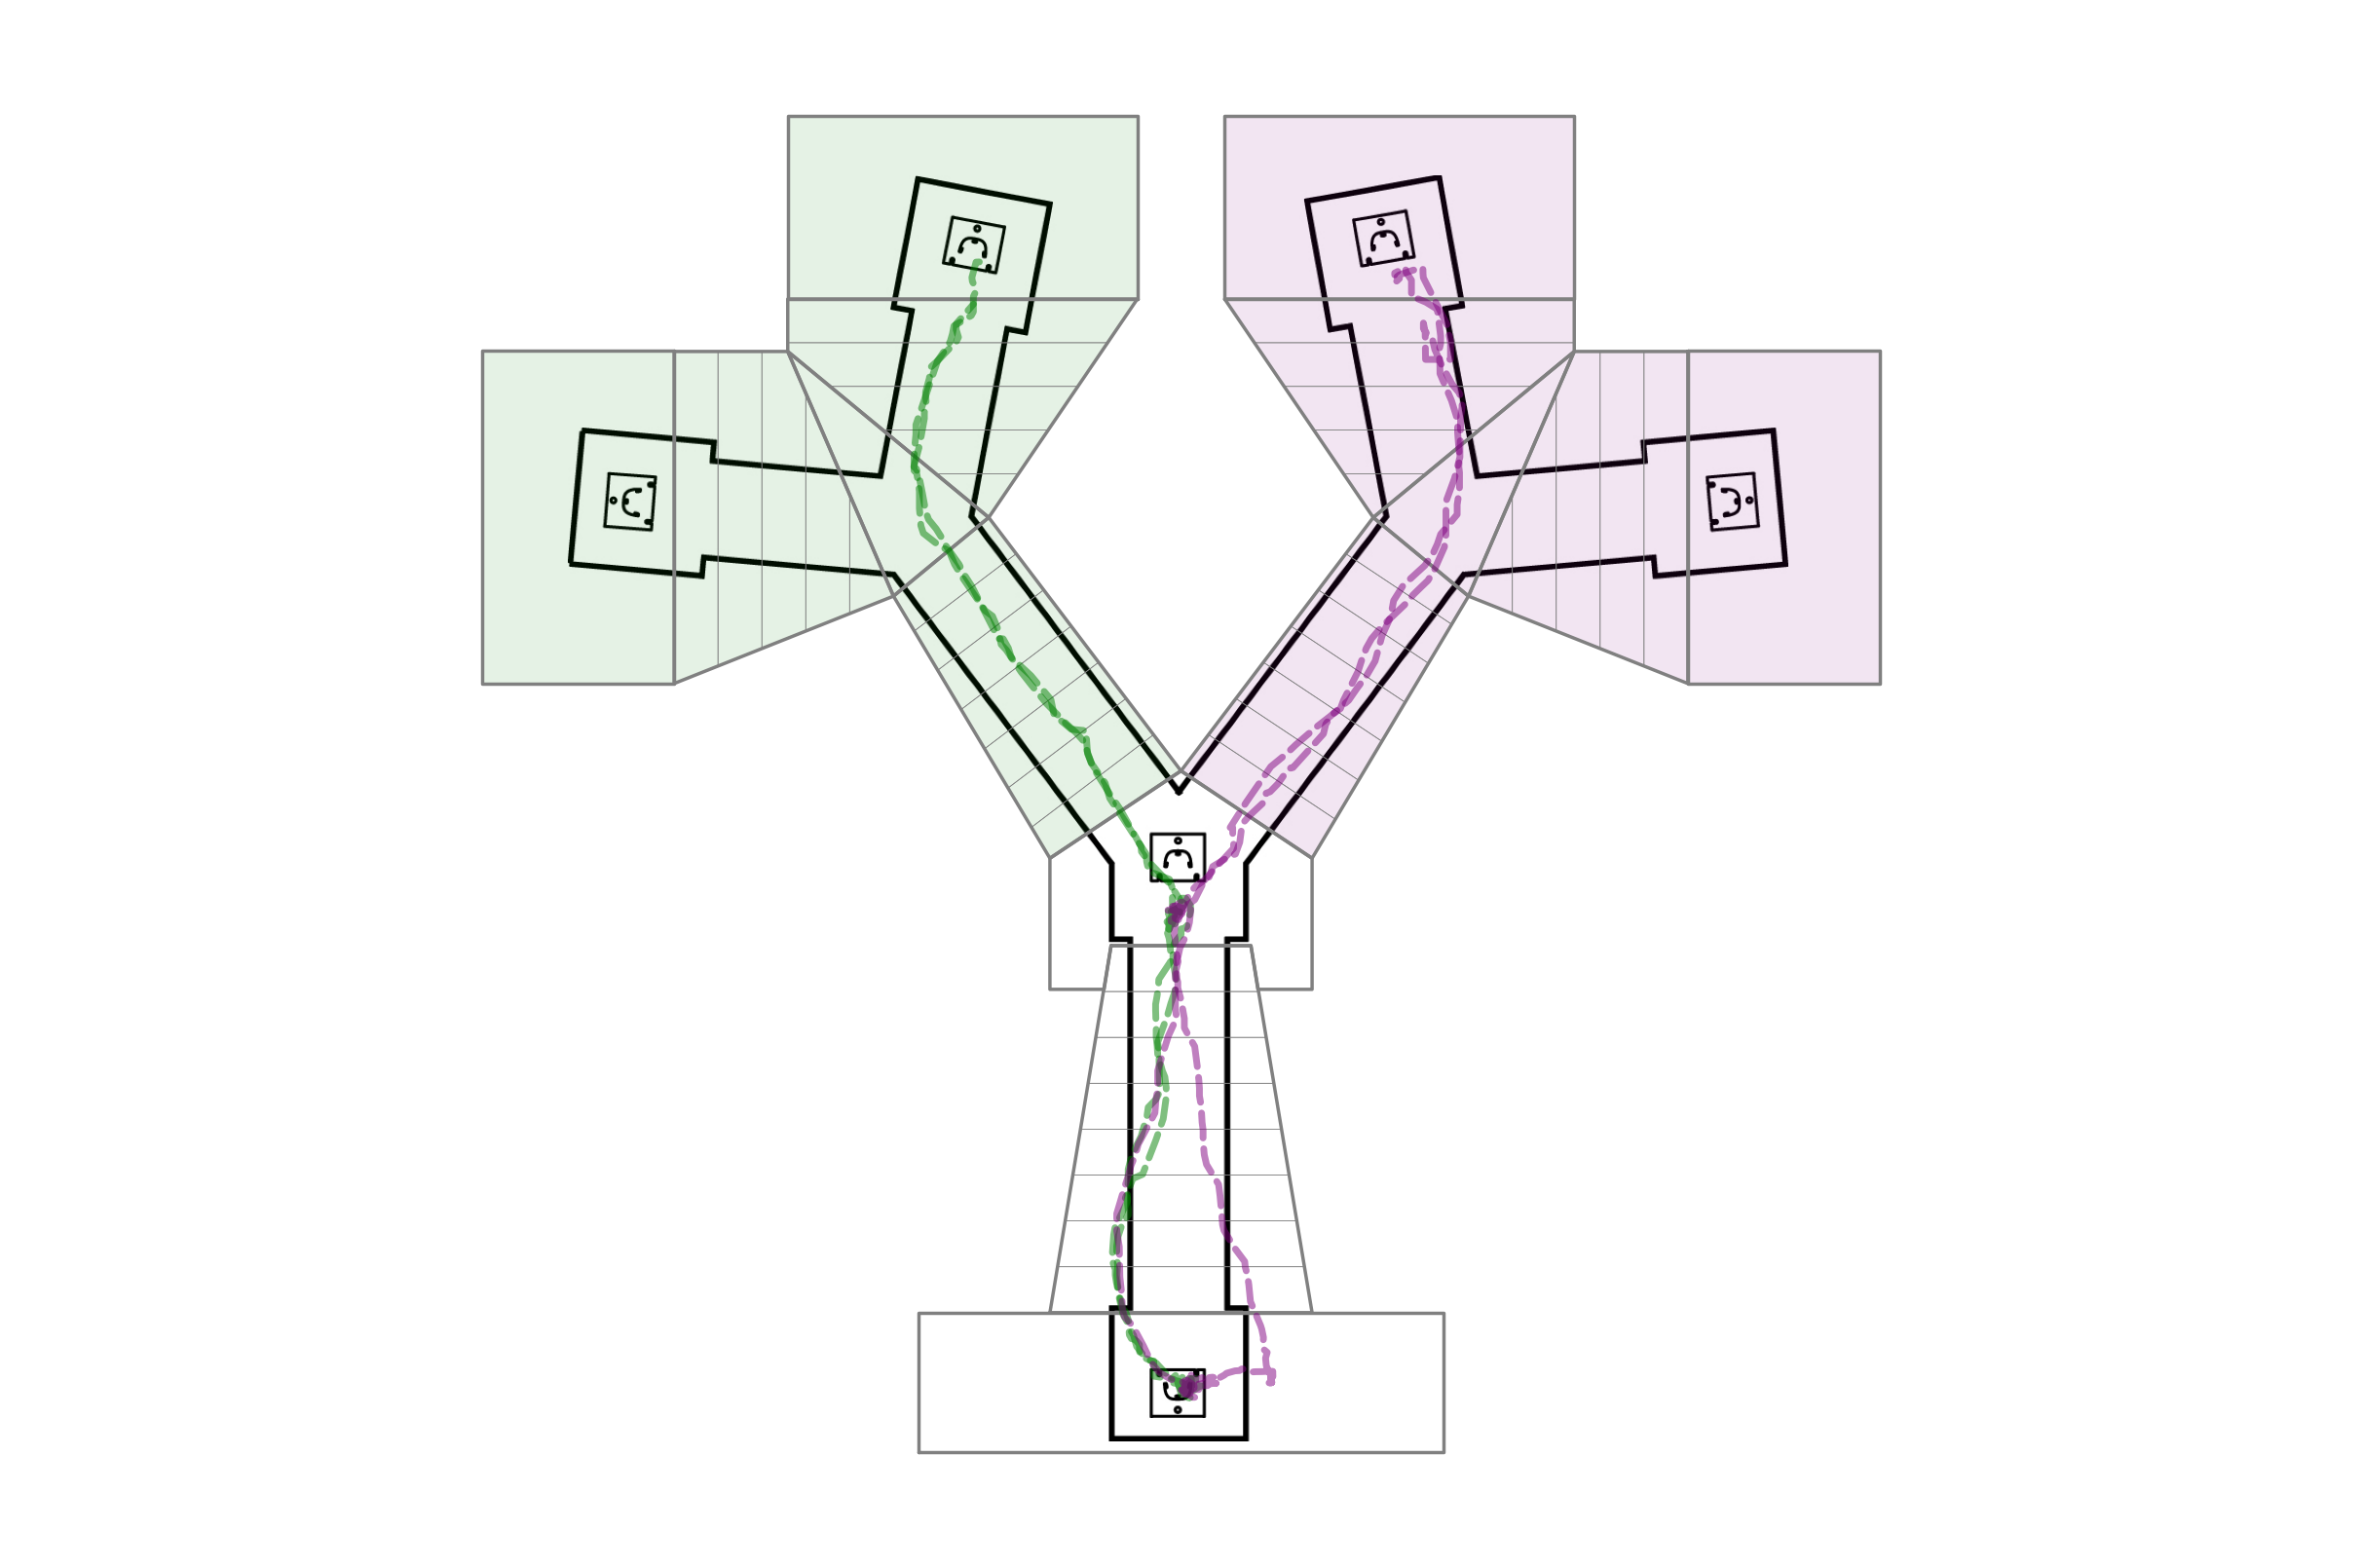

In [35]:
f,ax = plt.subplots(dpi=500)

ax = tree_maze.plot_maze(seg_color='cue', zone_labels=False, seg_alpha=0.1, font_size=5, lw=0.5, sub_segs='all', sub_seg_lw=0.1, sub_seg_color='None', tm_layout=True, axis=ax)
correct = 0
n_plot_trials = 2
max_dur=600
np.random.seed(4)
for dec in ['L', 'R']:
    dec_full = 'left' if dec=='L' else 'right'
    sub_table = behav.trial_table[ (behav.trial_table.dec==dec) & (behav.trial_table.correct==correct) & (behav.trial_table.dur<=max_dur)]
    
    sel_trials = np.random.choice(sub_table.index, n_plot_trials, replace=False)
    for trial in sel_trials:
        t0 = sub_table.loc[trial, 't0']
        tE = sub_table.loc[trial, 'tE']
        ax.plot(track_data.loc[t0:tE, 'x'],track_data.loc[t0:tE, 'y'], color=tree_maze.split_colors[dec_full], lw=1, alpha=0.5, linestyle='--' )   

In [26]:
ax.get_xlim(), ax.get_ylim()

((-1295.6870860927154, 1295.6870860927154), (-156.5, 1526.5))

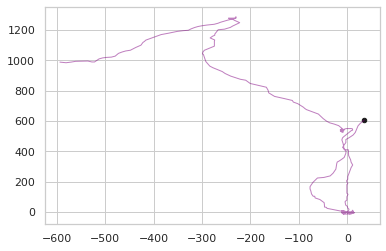

In [48]:
t0 = sub_table.loc[trial, 't0']
tE = sub_table.loc[trial, 'tE']
plt.plot(track_data.loc[t0:tE, 'x'],track_data.loc[t0:tE, 'y'], color=tree_maze.split_colors[cue_full], lw=1, alpha=0.5 )    
plt.scatter(track_data.loc[t0, 'x'],track_data.loc[t0, 'y'],s=20,color='k')

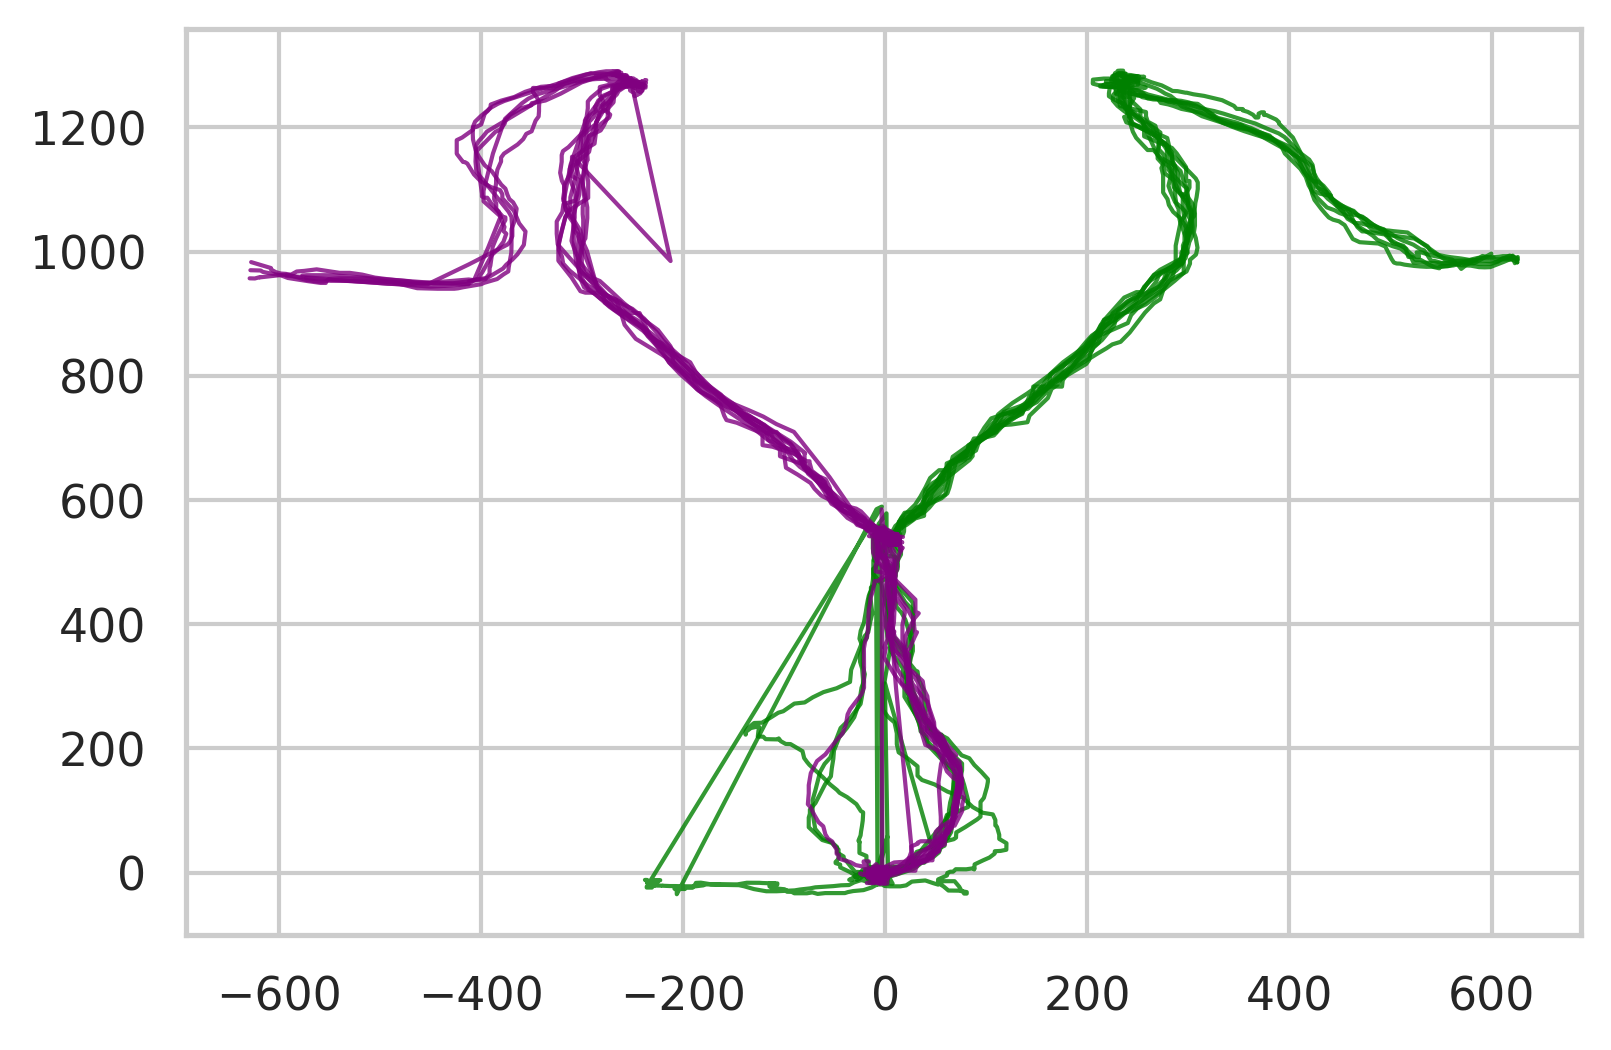

In [12]:
f, ax = plt.subplots(dpi=300)
correct = 1
n_plot_trials = 10
np.random.seed(17)
for cue in ['L', 'R']:
    cue_full = 'left' if cue=='L' else 'right'
    sub_table = behav.trial_table[ (behav.trial_table.cue==cue) & (behav.trial_table.correct==correct)]
    
    sel_trials = np.random.choice(sub_table.index, n_plot_trials, replace=False)
    for trial in sel_trials:
        t0 = sub_table.loc[trial, 't0']
        tE = sub_table.loc[trial, 'tE']
        ax.plot(-track_data.loc[t0:tE, 'x'],track_data.loc[t0:tE, 'y'], color=tree_maze.split_colors[cue_full], lw=1, alpha=0.8 )    

In [11]:
track_data.describe()

,t,x,y,ha
count,161895.000000,161895.000000,161895.000000,161895.000000
mean,2108.889160,27.401034,561.877648,2.925317
std,934.704285,212.866194,362.314275,1.715860
min,489.949005,-603.358957,-59.920936,0.000000
25%,1299.419006,-10.645958,174.462168,1.317724
50%,2108.889893,25.300481,572.785738,3.141593
75%,2918.359619,121.931159,908.290868,4.424410
max,3727.829102,626.786647,1256.176954,6.161012


In [13]:
track_data.head()

,t,x,y,ha
0,489.949,190.368533,850.551084,2.234021
1,489.969,176.504035,828.124600,1.815142
2,489.989,171.462017,827.906691,1.815142
3,490.009,162.134914,814.407219,1.431170
4,490.029,131.380287,778.154401,1.692969


In [24]:
behav.trial_table[10:20]

,t0,tE,dur,cue,dec,correct,long,goal,sw,vsw
10,10331,10590,259,R,L,0,-1,-1,0,0
11,11111,11676,565,L,R,0,-1,-1,1,0
12,12093,12483,389,L,L,1,1,4,0,0
13,12668,12918,249,L,L,1,0,3,0,0
14,13291,13580,288,R,L,0,-1,-1,1,1
15,14105,14414,309,R,R,1,0,2,0,0
16,14668,14982,314,L,L,1,1,4,1,1
17,15171,15452,281,R,L,0,-1,-1,1,1
18,15973,16275,302,R,R,1,0,2,0,0
19,16521,16785,263,R,L,0,-1,-1,0,0


In [15]:
behav.event_table.head()

,event,t0,tE,dur,trial_num,out_bound
0,Start,0,0,0,-1,0
1,DE2,33,38,5,-1,0
2,DE1,94,99,5,-1,0
3,RW1,94,118,24,-1,0
4,RD,94,118,24,-1,0


In [25]:
trial_nums = np.arange(13,17)
samps = np.arange(behav.trial_table.loc[trial_nums[0], 't0'],behav.trial_table.loc[trial_nums[-1], 'tE'] )

In [157]:
track_data.t[samps]

12668    743.309
12669    743.329
12670    743.349
12671    743.369
12672    743.389
          ...   
14977    789.489
14978    789.509
14979    789.529
14980    789.549
14981    789.569
Name: t, Length: 2314, dtype: float64

In [108]:
y_ticklabels[::2]

[Text(0, 0.5, 'Home'),
 Text(0, 4.5, 'i1'),
 Text(0, 8.5, 'G2'),
 Text(0, 12.5, 'G3'),
 Text(0, 8.5, 'G2'),
 Text(0, 10.5, 'i2'),
 Text(0, 12.5, 'G3'),
 Text(0, 14.5, 'G4')]

In [121]:
sec_ax.get_yticks(), y_ticks

(array([ 1.5,  3.5,  5.5,  7.5,  9.5, 11.5, 13.5]),
 array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5]))